In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
 
set_matplotlib_formats ('png')

/tmp/ipykernel_19266/4294946217.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats ('png')


In [2]:
file_ = pd.read_csv ("Данные.csv")

In [3]:
file_.head()

,"I, А","B1, мВб","B2, мВб",dB,Unnamed: 4,Медь:,"dm, г","I, А.1",Unnamed: 8,Алюминий:,...,Unnamed: 12,Графит мал,"dm, г.2","I, А.3",Unnamed: 16,Графит бол,"dm, г.3","I, А.4",Unnamed: 20,3) I = 3.02 A
0,0.3,2.1,1.3,0.8,NaN,NaN,0.000,0.3,NaN,NaN,...,NaN,NaN,0.014,0.3,NaN,NaN,-0.001,0.3,NaN,5) S * n = 72 см2
1,0.6,2.7,1.2,1.5,NaN,NaN,-0.001,0.6,NaN,NaN,...,NaN,NaN,0.043,0.6,NaN,NaN,-0.001,0.6,NaN,NaN
2,0.9,3.3,1.1,2.2,NaN,NaN,-0.002,0.9,NaN,NaN,...,NaN,NaN,0.079,0.9,NaN,NaN,-0.001,0.9,NaN,NaN
3,1.2,4.0,1.1,2.9,NaN,NaN,-0.002,1.2,NaN,NaN,...,NaN,NaN,0.114,1.2,NaN,NaN,-0.001,1.2,NaN,NaN
4,1.5,6.7,3.1,3.6,NaN,NaN,-0.005,1.5,NaN,NaN,...,NaN,NaN,0.153,1.5,NaN,NaN,-0.001,1.5,NaN,NaN


In [4]:
data = file_.values.T

In [5]:
I = data[0]

In [6]:
Ф = data[3] / 10 ** 3

In [7]:
SN = 72 / 10 ** 4

In [8]:
B = Ф / SN

In [9]:
B2 = B * B

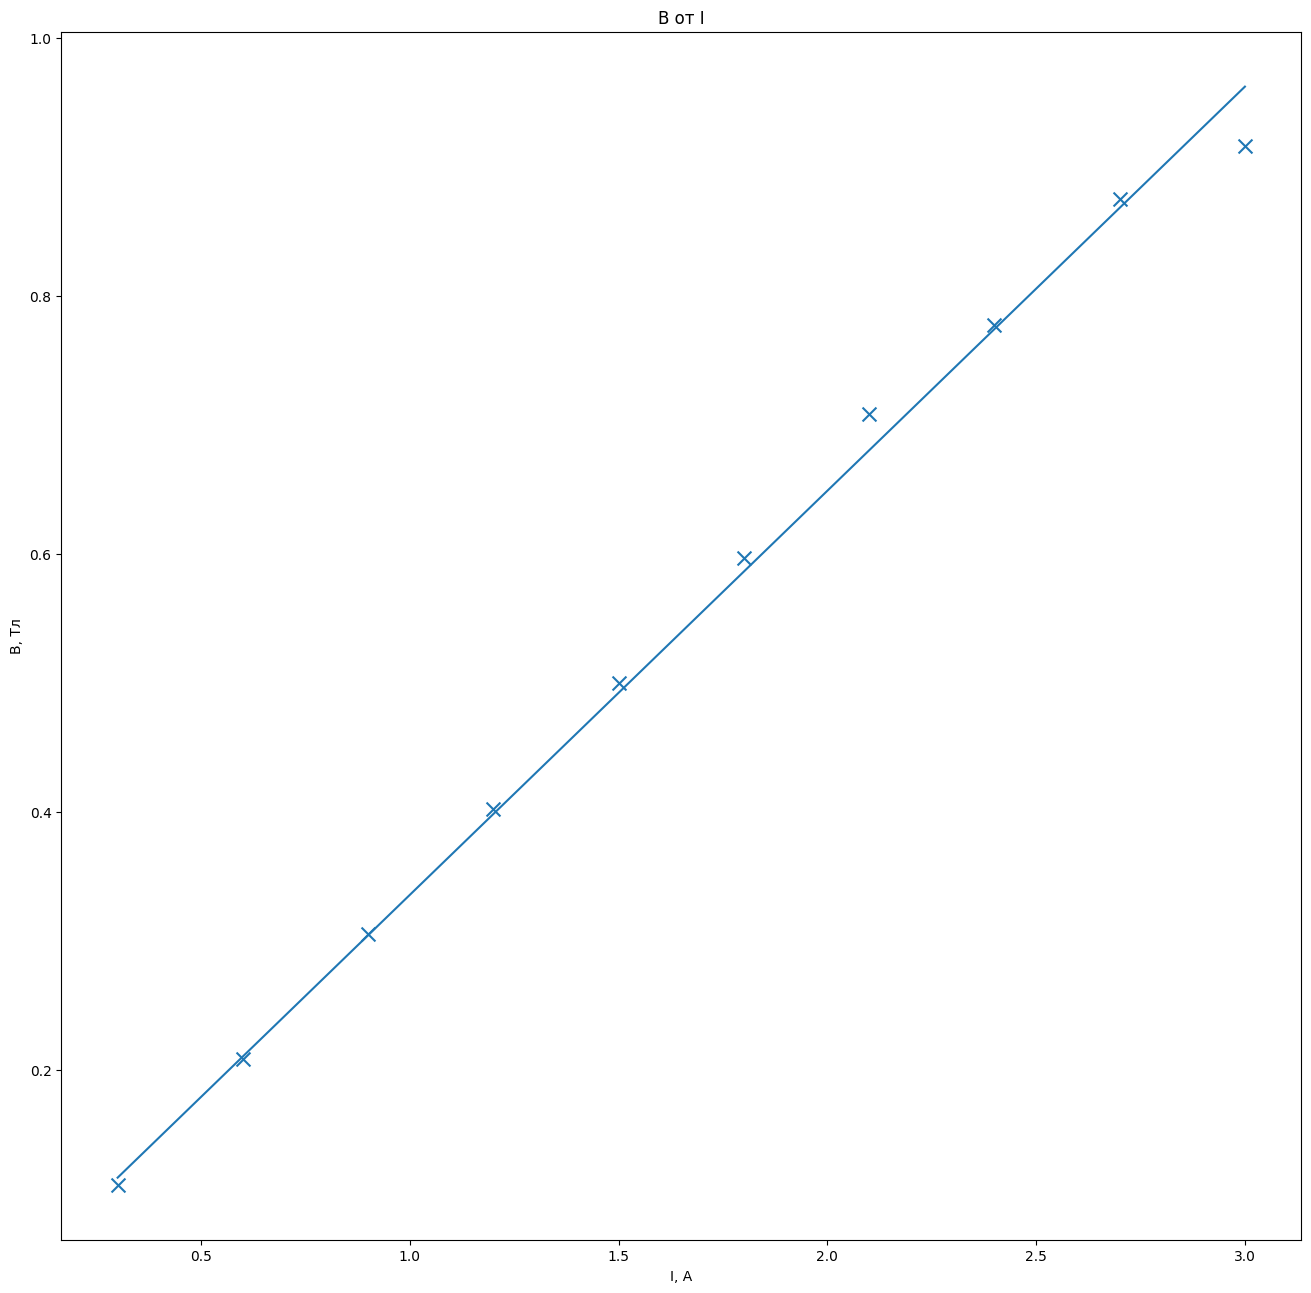

In [10]:
fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.set_title ("B от I")

ax1.set_ylabel ("B, Тл") 
ax1.set_xlabel ("I, А")

ax1.scatter (I, B, marker="x", s = 100)
ax1.plot ([I[0], I[-1]], [B[0] * 1.05, B[-1] * 1.05])

plt.savefig("pictures/graph1.png", dpi=100)
plt.show()

In [11]:
dPM = abs (data[6]) * 10**3 * 9.8
dPA = abs (data[10]) * 10**3 * 9.8
dPGm = abs (data[14]) * 10**3 * 9.8
dPGb = abs (data[18]) * 10**3 * 9.8

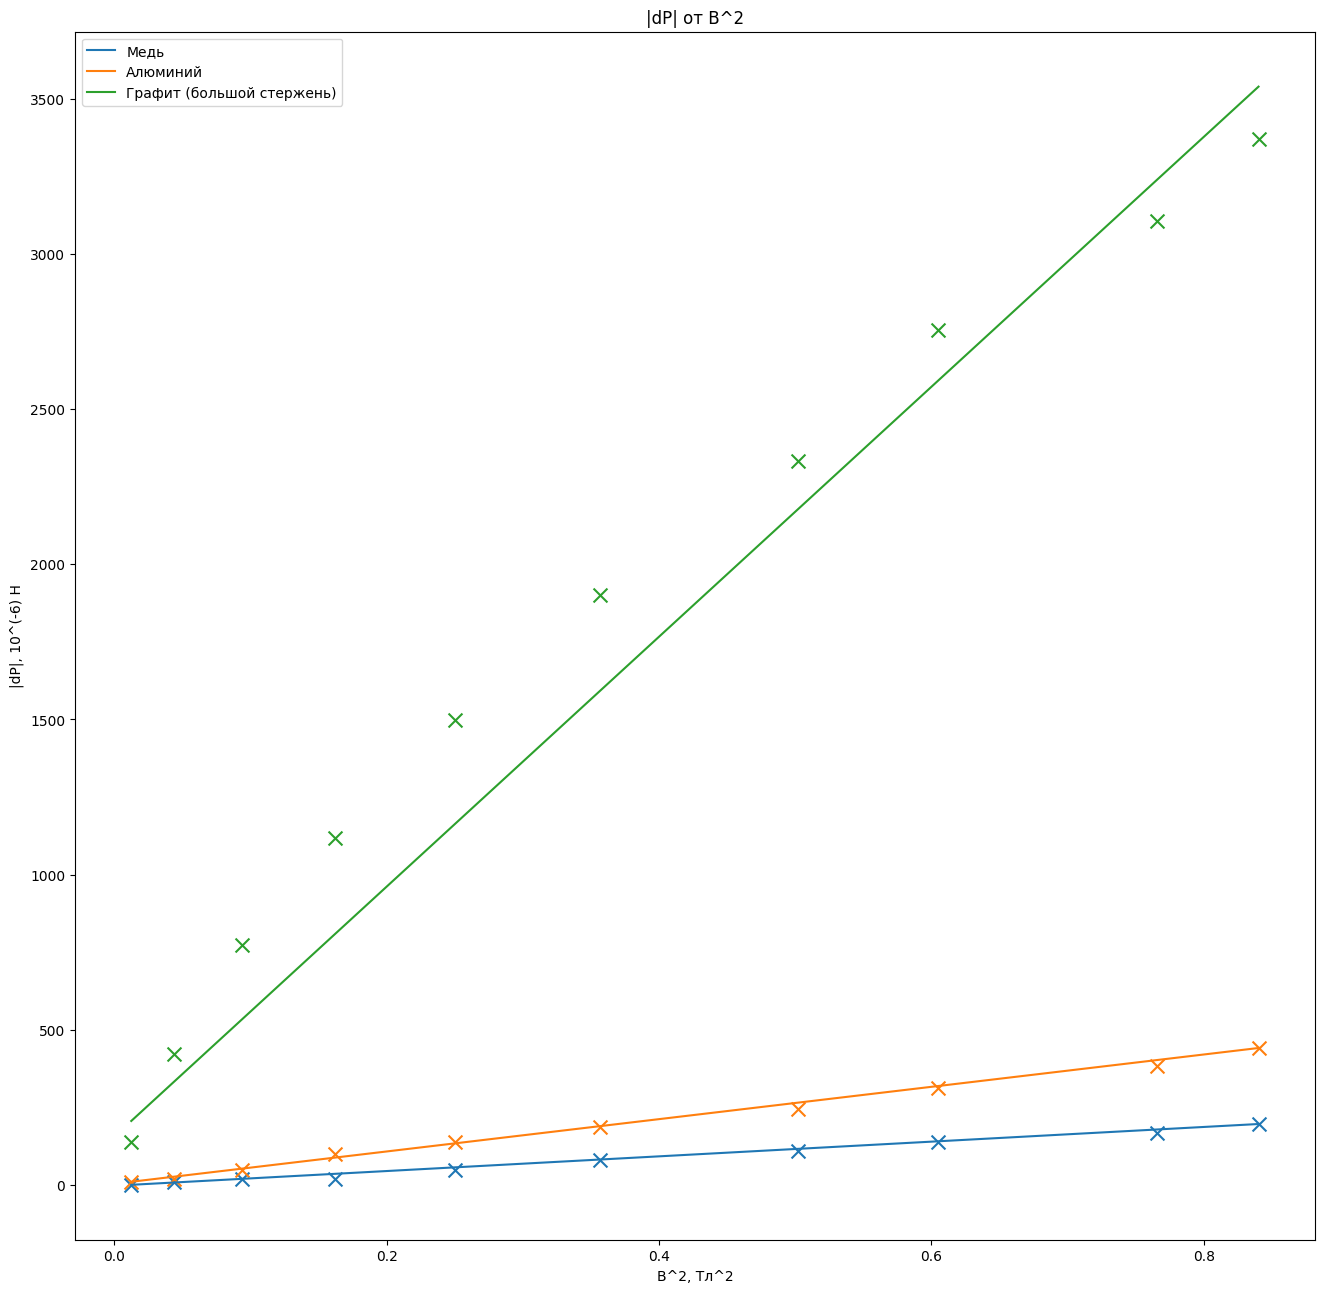

In [12]:
fig, ax1 = plt.subplots(figsize=(16, 16), dpi=100)

ax1.set_title ("|dP| от B^2")

ax1.set_ylabel ("|dP|, 10^(-6) Н") 
ax1.set_xlabel ("B^2, Тл^2")

ax1.scatter (B2, dPM, marker="x", s = 100)
ax1.plot ([B2[0], B2[-1]], [dPM[0], dPM[-1]], label="Медь")
ax1.scatter (B2, dPA, marker="x", s = 100)
ax1.plot ([B2[0], B2[-1]], [dPA[0], dPA[-1]], label="Алюминий")
ax1.scatter (B2, dPGm, marker="x", s = 100)
ax1.plot ([B2[0], B2[-1]], [dPGm[0] * 1.5, dPGm[-1] * 1.05], label="Графит (большой стержень)")
# ax1.scatter (B2, dPGb, marker="x", s = 100)
# ax1.plot ([B2[0], B2[-1]], [dPGb[0], dPGb[-1]], label="Графит (маленький стержень)")

plt.legend()
plt.savefig("pictures/graph2.png", dpi=100)
plt.show()

In [13]:
nu0 = 4 * np.pi / 10 ** 7

In [14]:
SM = np.pi * 0.01 ** 2 / 4
SA = np.pi * 0.01 ** 2 / 4
SGm = np.pi * (6.7 / 10 ** 3) ** 2 / 4
SGb = np.pi * (10.1 / 10 ** 3) ** 2  / 4

In [123]:
HIM = (dPM[-1] - dPM[0]) / (B2[-1] - B2[0]) * 2 * nu0 / SM / 10 ** 6
HIA = - (dPA[-1] - dPA[0]) / (B2[-1] - B2[0]) * 2 * nu0 / SA / 10 ** 6
HIGm = - (dPGm[-1] * 1.05 - dPGm[0] * 1.5) / (B2[-1] - B2[0]) * 2 * nu0 / SGm / 10 ** 6
HIGb = (dPGb[-1] - dPGb[0]) / (B2[-1] - B2[0]) * 2 * nu0 / SGb / 10 ** 6
print (HIM, HIA, HIGm, HIGb)

7.575500465983223e-06 -1.6666101025163095e-05 -0.0002870556091030845 1.4852466358167287e-06


In [126]:
dHIM = HIM * 5 / 100
dHIA = HIA * 5 / 100
dHIGm = HIGm * 5 / 100
dHIGb = HIGb * 5 / 100

print (dHIM, dHIA, dHIGm, dHIGb)

3.787750232991612e-07 -8.333050512581547e-07 -1.4352780455154224e-05 7.426233179083643e-08
